In [1]:
%matplotlib inline


from neuron import h
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py

from cell_inference.utils.plotting.plot_results import plot_lfp_traces, plot_lfp_heatmap
from cell_inference.utils.feature_extractors.SummaryStats2D import calculate_stats, build_lfp_grid
from cell_inference.cells.stylizedcell import CellTypes
from cell_inference.cells.activecell import ActiveCell
from cell_inference.cells.passivecell import PassiveCell
from cell_inference.cells.simulation import Simulation
from cell_inference.utils.currents.recorder import Recorder
from cell_inference.config import paths, params
from cell_inference.utils.feature_extractors.parameterprediction import ClassifierTypes, ClassifierBuilder

cell_type = CellTypes.ACTIVE

h.nrn_load_dll(paths.COMPILED_LIBRARY)
geo_standard = pd.read_csv(paths.GEO_STANDARD,index_col='id')
h.tstop = params.TSTOP
h.dt = params.DT

In [ ]:
SUMM_STAT_PATH = 'cell_inference/resources/geo_summ_stats.npy'
LFP_PATH = 'cell_inference/resources/geo_lfp.npy'

data   = np.load(SUMM_STAT_PATH)['x']
labels = np.load(SUMM_STAT_PATH)['y']

In [6]:
from cell_inference.utils.feature_extractors.helperfunctions import train_regression, build_dataloader_from_numpy
train_loader, test_loader = build_dataloader_from_numpy(input_arr=data, labels_arr=labels, batch_size=64)

In [7]:
from cell_inference.utils.feature_extractors.fullyconnectednetwork import FullyConnectedNetwork, ActivationTypes
from cell_inference.utils.feature_extractors.convolutionalnetwork import ConvolutionalNetwork
import torch

# model1 = ConvolutionalNetwork(in_channels=1, num_labels=2)
# model1 = torch.load('cell_inference/resources/results/pytorch_models/16_23_59__01_04_2022.pt')
model1 = FullyConnectedNetwork(in_features=40, out_features=3, hidden_layers=6)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #torch.device("cpu")
model1.to(device)

train_regression(model1, train_loader, test_loader, 300, learning_rate=0.001, device=device)

  2%|▏         | 5/300 [00:00<00:13, 22.55it/s]

Training Loss: 874563.55078125 Validation Loss: 301028.7734375


  5%|▍         | 14/300 [00:00<00:12, 22.53it/s]

Training Loss: 154398.9150390625 Validation Loss: 45725.7333984375


  8%|▊         | 23/300 [00:01<00:12, 21.52it/s]

Training Loss: 117055.20703125 Validation Loss: 34617.91552734375


 12%|█▏        | 35/300 [00:01<00:12, 21.99it/s]

Training Loss: 75384.609375 Validation Loss: 25106.3115234375


 15%|█▍        | 44/300 [00:01<00:11, 21.99it/s]

Training Loss: 62257.884521484375 Validation Loss: 20167.423828125


 18%|█▊        | 53/300 [00:02<00:11, 21.71it/s]

Training Loss: 57329.064208984375 Validation Loss: 18358.02099609375


 22%|██▏       | 65/300 [00:02<00:10, 22.19it/s]

Training Loss: 50611.72021484375 Validation Loss: 15913.005615234375


 25%|██▍       | 74/300 [00:03<00:10, 22.19it/s]

Training Loss: 44624.89794921875 Validation Loss: 13742.346435546875


 28%|██▊       | 83/300 [00:03<00:09, 22.84it/s]

Training Loss: 40657.51611328125 Validation Loss: 12456.602294921875


 32%|███▏      | 95/300 [00:04<00:08, 23.44it/s]

Training Loss: 37216.33837890625 Validation Loss: 11450.253173828125


 35%|███▍      | 104/300 [00:04<00:08, 23.39it/s]

Training Loss: 34446.07763671875 Validation Loss: 10650.33251953125


 38%|███▊      | 113/300 [00:05<00:07, 23.64it/s]

Training Loss: 32263.215576171875 Validation Loss: 10139.141967773438


 42%|████▏     | 125/300 [00:05<00:07, 23.92it/s]

Training Loss: 30787.763549804688 Validation Loss: 9773.280395507812


 45%|████▍     | 134/300 [00:05<00:07, 23.66it/s]

Training Loss: 28723.619384765625 Validation Loss: 9769.134033203125


 48%|████▊     | 143/300 [00:06<00:06, 23.96it/s]

Training Loss: 27012.237915039062 Validation Loss: 9618.271728515625


 52%|█████▏    | 155/300 [00:06<00:06, 23.83it/s]

Training Loss: 25869.34130859375 Validation Loss: 9775.879760742188


 55%|█████▍    | 164/300 [00:07<00:05, 23.95it/s]

Training Loss: 24722.447143554688 Validation Loss: 9317.921630859375


 58%|█████▊    | 173/300 [00:07<00:05, 23.87it/s]

Training Loss: 23037.282470703125 Validation Loss: 9457.213256835938


 62%|██████▏   | 185/300 [00:08<00:04, 23.56it/s]

Training Loss: 21887.368530273438 Validation Loss: 9135.92138671875


 65%|██████▍   | 194/300 [00:08<00:04, 23.01it/s]

Training Loss: 21959.50164794922 Validation Loss: 9940.252197265625


 68%|██████▊   | 203/300 [00:08<00:04, 23.28it/s]

Training Loss: 20872.506408691406 Validation Loss: 9586.2197265625


 72%|███████▏  | 215/300 [00:09<00:03, 23.70it/s]

Training Loss: 20358.577758789062 Validation Loss: 9513.73486328125


 75%|███████▍  | 224/300 [00:09<00:03, 23.40it/s]

Training Loss: 19925.624450683594 Validation Loss: 9208.391235351562


 78%|███████▊  | 233/300 [00:10<00:02, 23.28it/s]

Training Loss: 19291.391540527344 Validation Loss: 9097.055908203125


 82%|████████▏ | 245/300 [00:10<00:02, 24.75it/s]

Training Loss: 18872.600646972656 Validation Loss: 9124.7861328125


 85%|████████▍ | 254/300 [00:10<00:01, 23.49it/s]

Training Loss: 18431.538696289062 Validation Loss: 8930.432373046875


 88%|████████▊ | 263/300 [00:11<00:01, 23.67it/s]

Training Loss: 18762.438842773438 Validation Loss: 8779.935424804688


 92%|█████████▏| 275/300 [00:11<00:01, 22.91it/s]

Training Loss: 18139.908447265625 Validation Loss: 8441.387573242188


 95%|█████████▍| 284/300 [00:12<00:00, 23.62it/s]

Training Loss: 17488.399291992188 Validation Loss: 8166.7471923828125


 98%|█████████▊| 293/300 [00:12<00:00, 23.68it/s]

Training Loss: 17183.435119628906 Validation Loss: 8267.23388671875


100%|██████████| 300/300 [00:12<00:00, 23.24it/s]


In [8]:
from sklearn.metrics import r2_score
x, y = next(iter(test_loader))
model1.eval()
x = x.to(device)
output = model1(x)
output = output.to("cpu").detach().numpy()
y = y.to("cpu").detach().numpy()
print("R2: {}".format(r2_score(y, output)))
print(output.shape)
print(y.shape)

R2: -2.0501674070224016
(64, 3)
(64, 3)


<IPython.core.display.Javascript object>


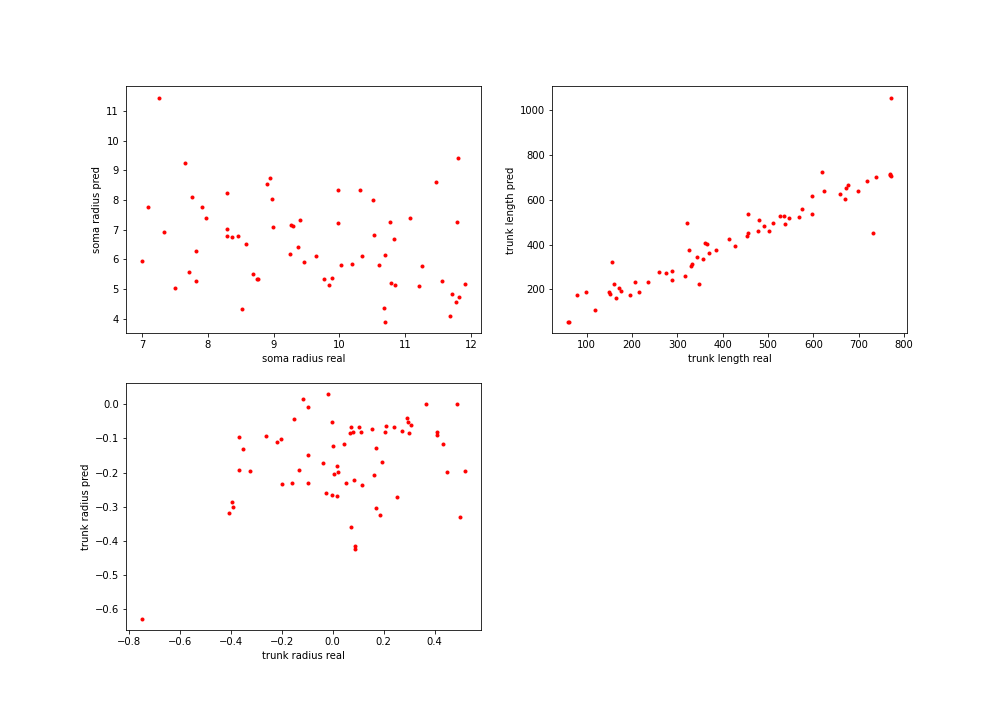

In [11]:
%matplotlib notebook

idx = 0

plt.figure(figsize=(14, 10))
#inf_list = ['r_s', 'l_t', 'r_t', 'r_d', 'r_tu', 'l_d']

ax_s = plt.subplot(221)
ax_s.scatter(y[:,0], output[:,0], c='red', marker='.')
ax_s.set_xlabel('soma radius real')
ax_s.set_ylabel('soma radius pred')

ax_t = plt.subplot(222)
ax_t.scatter(y[:,1], output[:,1], c='red', marker='.')
ax_t.set_xlabel('trunk length real')
ax_t.set_ylabel('trunk length pred')

ax_t = plt.subplot(223)
ax_t.scatter(y[:,2], output[:,2], c='red', marker='.')
ax_t.set_xlabel('trunk radius real')
ax_t.set_ylabel('trunk radius pred')

# ax_t = plt.subplot(324)
# ax_t.scatter(y[:,3], output[:,3], c='red', marker='.')
# ax_t.set_xlabel('dendrite radius real')
# ax_t.set_ylabel('dendrite radius pred')

# ax_t = plt.subplot(325)
# ax_t.scatter(y[:,4], output[:,4], c='red', marker='.')
# ax_t.set_xlabel('tuft radius real')
# ax_t.set_ylabel('tuft radius pred')

# ax_t = plt.subplot(326)
# ax_t.scatter(y[:,5], output[:,5], c='red', marker='.')
# ax_t.set_xlabel('dendrite length real')
# ax_t.set_ylabel('dendrite length pred')

plt.show()

<IPython.core.display.Javascript object>


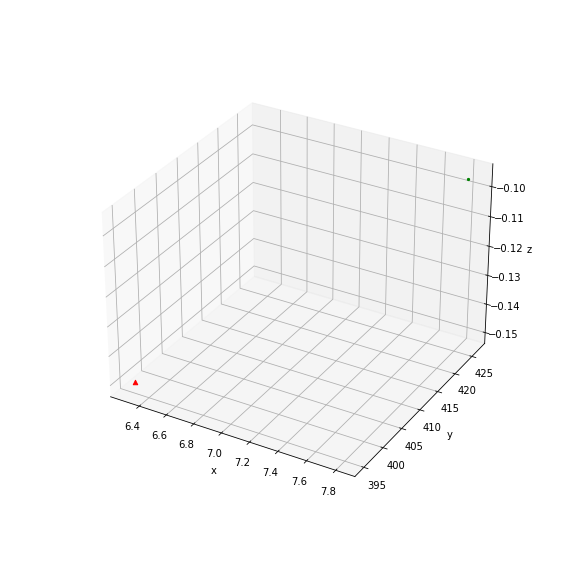

Text(0.5, 0, 'z')

In [10]:
%matplotlib notebook

idx = 0#[0, 1, 2, 3, 4, 5]

plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(y[idx,0], y[idx,1], y[idx,2], c='green', marker='.')
ax.scatter3D(output[idx,0], output[idx,1], output[idx,2], c='red', marker='^')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# plt.show()